<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML321ENSkillsNetwork32585014-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis on Online Course Enrollment Data**


Estimated time needed: **45** minutes


Before we keep our heads down building a cool personalized online courses recommender system, we always need to take a look at data first since it is the essence of any machine learning system. We need to explore what kind of data we will need and what such data would look like.


You have already learned it is important to perform initial investigations on the data and how to perform exploratory data analysis to find preliminary insights such as data patterns and to check assumptions with the help of summary statistics and graphical representations.

Now, let's apply your EDA skills to online courses related datasets such as course titles/genres and course enrollments.


## Objectives


After completing this lab you will be able to:


*   Identify keywords in course titles using a WordCloud
*   Calculate the summary statistics and visualizations of the online course content dataset
*   Determine popular course genres
*   Calculate the summary statistics and create visualizations of the online course enrollment dataset
*   Identify courses with the greatest number of enrolled students


***


## Prepare and setup the lab environment


At the beginning, we need to install two required Python packages.


In [1]:
#!pip install seaborn==0.11.1
#!pip install wordcloud==1.8.1

and import necessary class/methods in the packages


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [3]:
# also set a random state
rs = 123

### Load and explore the dataset


First, let's load the datasets as `Pandas` dataframes and start some basic exploratory data analysis tasks on them.


In [4]:
# Point to the datasets stored on the cloud
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
ratings_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/ratings.csv"

In [5]:
course_df = pd.read_csv(course_genre_url)
ratings_df = pd.read_csv(ratings_url)

We will start by exploring the course genre dataset. Let's first check its columns/features name:


In [6]:
course_df.columns

Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')

We can see from the above cell output that the columns represent some metadata about a course such as its id, title, and genres. We can see that the course genres are some popular topics related to machine learning, databases, app developments, etc.


We can also check how many unique courses we have in this dataset:


In [7]:
course_df.shape[0]

307

Then we can take a quick look at its header rows


In [8]:
course_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [9]:
course_df.dtypes

COURSE_ID          object
TITLE              object
Database            int64
Python              int64
CloudComputing      int64
DataAnalysis        int64
Containers          int64
MachineLearning     int64
ComputerVision      int64
DataScience         int64
BigData             int64
Chatbot             int64
R                   int64
BackendDev          int64
FrontendDev         int64
Blockchain          int64
dtype: object

As we can see, the `COURSE_ID` and `TITLE` are `str` datatypes and all the course genres are binary/int datatypes. Any genre column with value 1 means the course is associated with the course genre while 0 means the course is not.


For example, the following course `accelerating deep learning with gpu` is associated with genres `Python`, `MachineLearning`, and `DataScience`


In [10]:
course_df.iloc[1, ]

COURSE_ID                                     ML0122EN
TITLE              accelerating deep learning with gpu
Database                                             0
Python                                               1
CloudComputing                                       0
DataAnalysis                                         0
Containers                                           0
MachineLearning                                      1
ComputerVision                                       0
DataScience                                          1
BigData                                              0
Chatbot                                              0
R                                                    0
BackendDev                                           0
FrontendDev                                          0
Blockchain                                           0
Name: 1, dtype: object

Next, let's focus on the course title column by trying to determine keywords in the titles. Those keywords in the titles may give us a more intuitive summary of what kind of courses we have in the dataset.


### Plot a Word Cloud from Course Titles


First, let's join all the title values into one string, then we can conveniently get a wordcloud from the big string:


In [11]:
titles = " ".join(title for title in course_df['TITLE'].astype(str))

In [12]:
titles

'robots are coming  build iot apps with watson  swift  and node red accelerating deep learning with gpu consuming restful services using the reactive jax rs client analyzing big data in r using apache spark containerizing  packaging  and running a spring boot application cloud native security conference  data security data science bootcamp with r for university proffesors learn how to use docker containers for iterative development scorm test course create your first mongodb database testing microservices with the arquillian managed container cloud pak for integration essentials watson analytics for social media data science bootcamp with python for university professors  advance create a cryptocurrency trading algorithm in python data   ai essentials securing java microservices with eclipse microprofile json web token  microprofile jwt  enabling distributed tracing in microservices with zipkin sql access for hadoop ybrid cloud conference  ai pipelines lab dataops methodology data   ai

We also want to filter common stop words and some less meaningful words:


In [13]:
# English Stopwords
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])

Then, we create a `WordCloud` object and generate `wordcloud` from the titles.


In [14]:
from PIL import Image
    
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400, colormap='Set2', collocations=False)

In [15]:
wordcloud.generate(titles)

We can use `plt.imshow()` method to visualize the generated wordcloud:


''

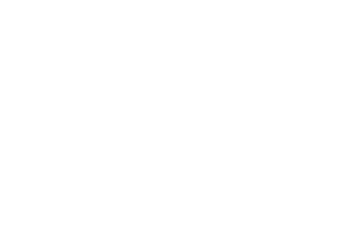

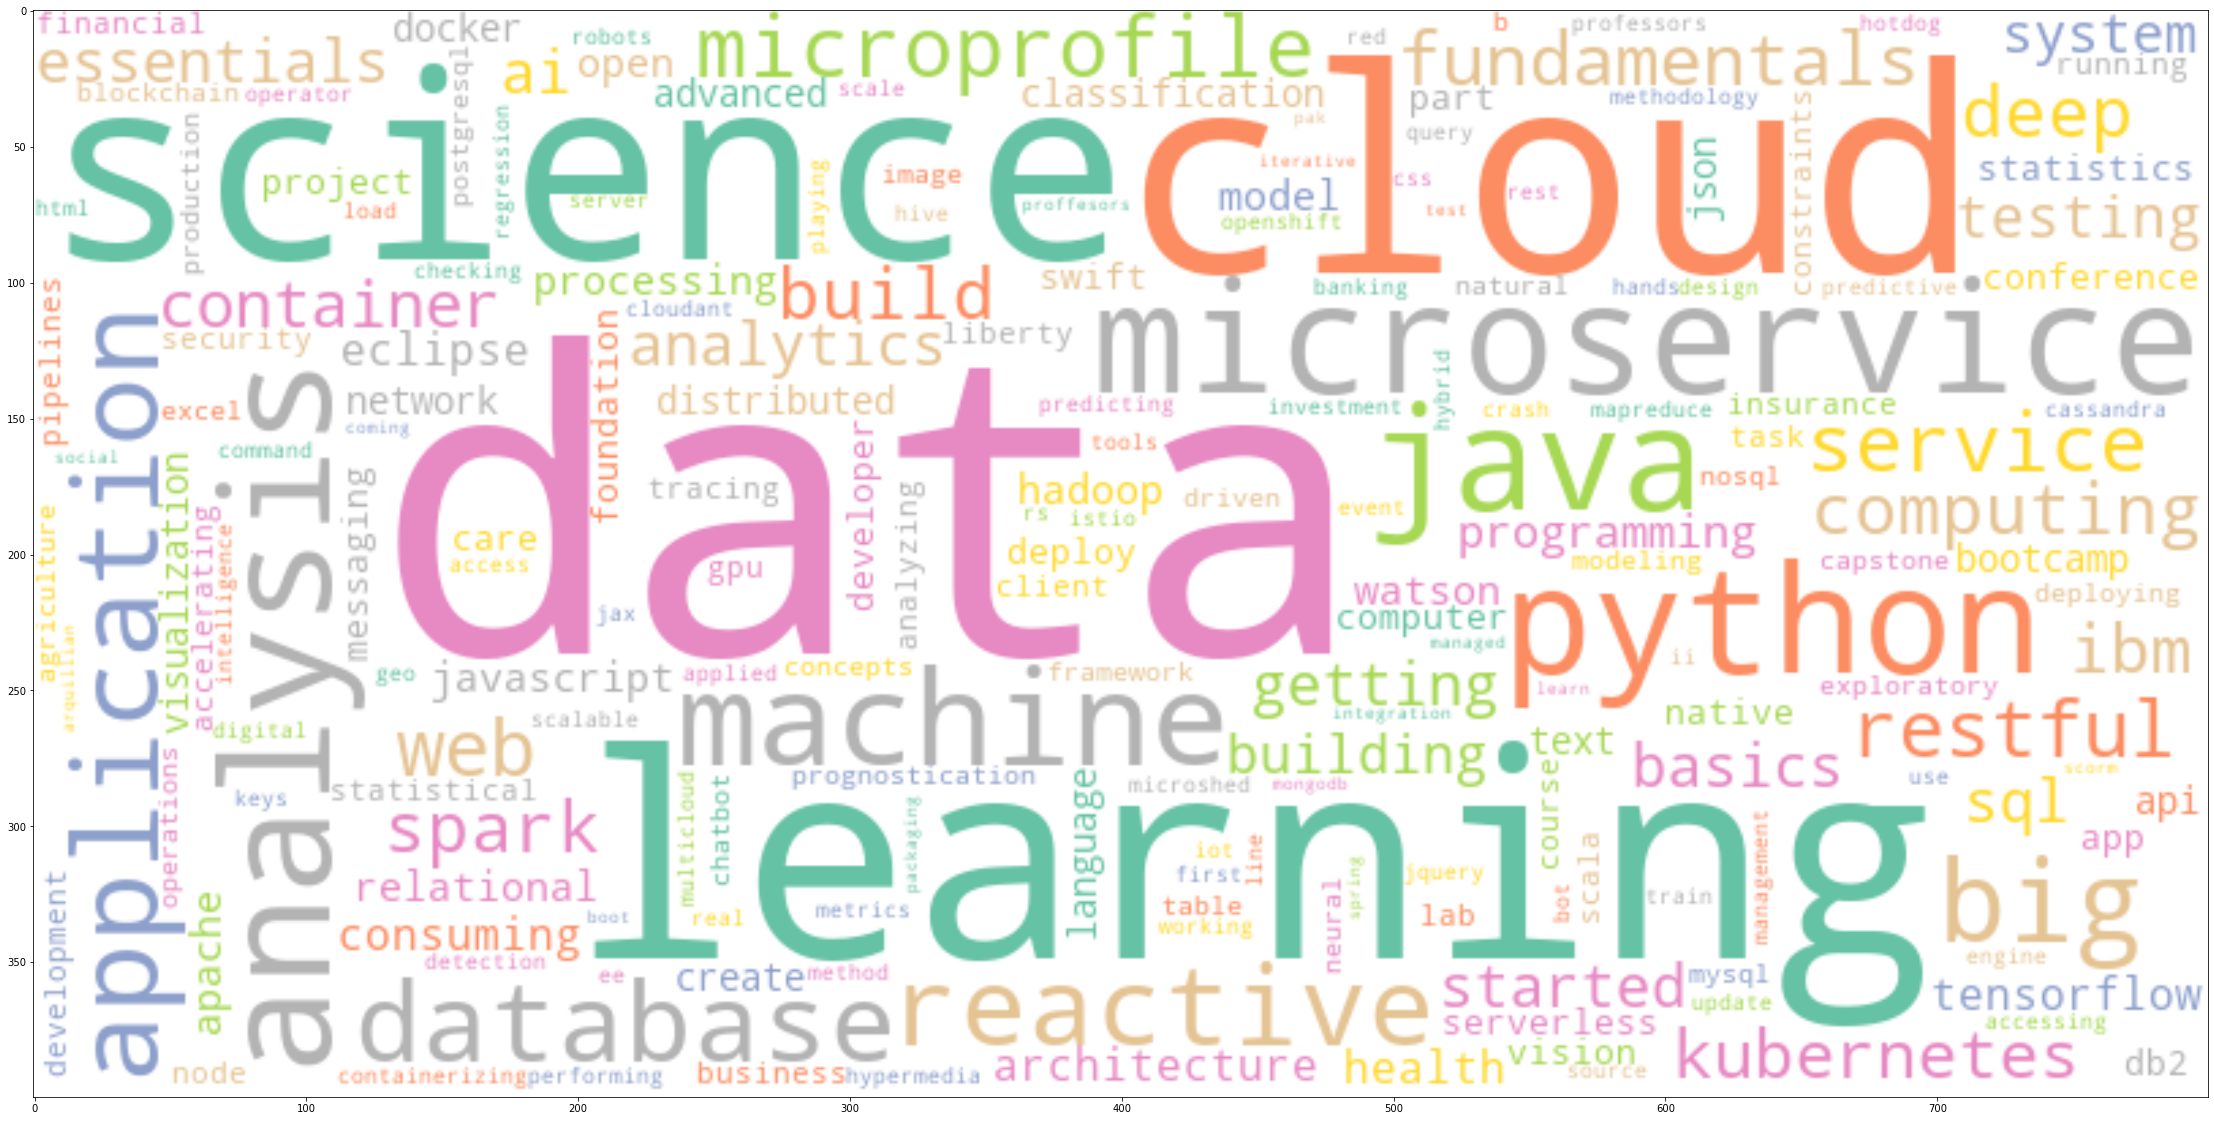

In [16]:

plt.axis("off")
plt.figure(figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
#plt.show()
;

As we can see from the `wordcloud`,  there are many popular IT related keywords such as python, data science, machine learning, big data, ai, tensorflow, container, cloud, etc. By looking at these keywords, we should have a general understanding that the courses in the dataset are focused on demanding IT skills.


Next, you need to perform some more detailed analysis on the course dataset.


### TASK: Analyze Course Genres


First, you can try to find out which courses may be of interest you. For example, what are the all machine learning related courses?


*TODO: Find all courses with genre `MachineLearning` == 1*


In [17]:
course_df.loc[course_df.MachineLearning == 1,['TITLE']]

,TITLE
1,accelerating deep learning with gpu
15,data ai essentials
19,ybrid cloud conference ai pipelines lab
21,data ai jumpstart your journey
24,ai for everyone master the basics
...,...
274,convolutional neural networks in tensorflow
282,machine learning with big data
290,natural language processing with attention models
291,natural language processing with sequence models


Similarly, you can try to find out what are the scalable machine learning courses?


*TODO: Find all courses with genres `MachineLearning` == 1 and `BigData` == 1*

In [18]:
# WRITE YOUR CODE HERE
course_df.loc[ (course_df['MachineLearning'] == 1) & (course_df['BigData'] == 1),['TITLE']]

,TITLE
46,insurance risk assessment with montecarlo meth...
59,text analytics at scale
184,spark mllib
282,machine learning with big data


In [19]:
genres = course_df.columns[2:]
genres

Index(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')

Given all the course genres, now let's calculate the course count for each genre. e.g., there are 69 courses that belong to the `MachineLearning` genre and 23 courses that belong to the `Python` genre. We also want to sort the genre count list to find the most popular course genres.


*TODO: Use the Pandas dataframe sum() and sort_values() methods to genreate a sorted course count per genre. You may also implement the task with different solutions*


In [20]:
## WRITE YOUR CODE HERE
genres_count = course_df.iloc[:,2:].sum().sort_values(ascending=False).to_frame()
genres_count.reset_index(inplace=True)
genres_count.rename(columns = {'index':'Genre', 0:'Count'}, inplace = True)
genres_count

,Genre,Count
0,BackendDev,78
1,MachineLearning,69
2,Database,60
3,DataAnalysis,56
4,DataScience,38
5,CloudComputing,37
6,BigData,36
7,Python,28
8,FrontendDev,19
9,Containers,17


We can also vsiaulize course genre counts using a bar chart:


*TODO: Use seaborn barplot or other plot methods to plot course genre counts using a barchart. The x-axis is the course genre and the y-axis is the course count per genre.*


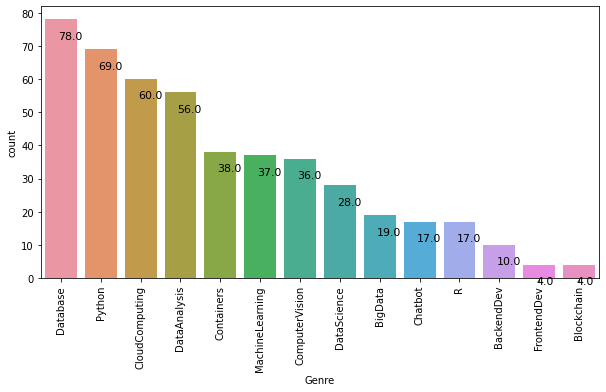

In [21]:
plt.figure(figsize=(10,5))

ax=sns.barplot(data=genres_count, y='Count', x='Genre')

ax.set(ylabel='count')

ax.set_xticklabels(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'], rotation=90)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.33, p.get_height()), va='top', color='black', size=11)
    #percentage = '{:.0f}%'.format(100 * p.get_height()/len(genres_count['Genre']))
    x = p.get_x()+0.27
    y = p.get_height()
    #plt.annotate(percentage, (x, y),va='top', color='black', size=11)
    plt.xticks(rotation = 90)
    
plt.show()

Now, you should have some solid understanding about all course metadata including the keywords in titles and popular course genres. Next, we will switch gears to exploring course learners related datasets.


### TASK: Analyze Course Enrollments


Let's first take a look at the course enrollments dataset.


In [22]:
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0


This dataset contains three colums, `user` representing a unique user id, `item` representing a course id, and `rating` representing a course enrollment mode.


In an online learning scenario, we have learners or students as users who enrolled courses. In fact, to follow the standard recommender system naming convention, we call each learner as a `user`, each course an `item`, and the enrollment mode or interaction as `rating`. So that's why we have columns named `user`, `item`, and `rating` instead of using `learner`, `course`, and `enrollment`.

In this project, we may use these terms interchangeably.


In [23]:
ratings_df['rating'].unique()

array([3., 2.])

The rating column contains one of two values: `2` means the user just audited the course without completing it and `3` means the user completed the course and earned a certificate.
Two other possible values are not explicitly available in this project: `0` or `NA` means the user has no interaction with the course and `1` means the user just browsed the course.


Let's see how many ratings/enrollment we have in the dataset:


In [24]:
ratings_df.shape[0]

233306

We have 233306 enrollments. In fact, each user is likely to interact with multiple items so let's find the rating counts for each user:


*TODO: Apply Pandas' groupby() and size() method on the user column to aggregate the rating count for each user, then report the total number of users after aggregation.*


In [25]:
# WRITE YOUR CODE HERE
user_df=ratings_df.groupby(['user'],as_index=False)['rating'].size() #also count() can be used, and allso works
user_df.rename(columns={'size':'agg_rating'}, inplace=True)
user_df

,user,agg_rating
0,2,61
1,4,44
2,5,59
3,7,1
4,8,3
...,...,...
33896,2102054,8
33897,2102356,1
33898,2102680,11
33899,2102983,1


After the aggregation, you should get a new dataframe showing the rating count for each user. For example, user 4 rated 44 items and user 2 rated 61 items. Next, let's try to get some summary statistics and visualizations from the user ratings count dataframe.


*TODO: Use describe() to report the statistics summary of the user enrollments.*


In [26]:
## WRITE YOUR CODE HERE
user_df.describe().T

,count,mean,std,min,25%,50%,75%,max
user,33901.0,1.064064e+06,497257.757886,2.0,681348.0,1043907.0,1451159.0,2103039.0
agg_rating,33901.0,6.881980e+00,5.823548,1.0,2.0,6.0,9.0,61.0


We can also get a histogram showing the enrollment distributions, e.g., how many users rated just 1 item or how many rated 10 items, etc.


*TODO: Plot the histogram of user rating counts.*


''

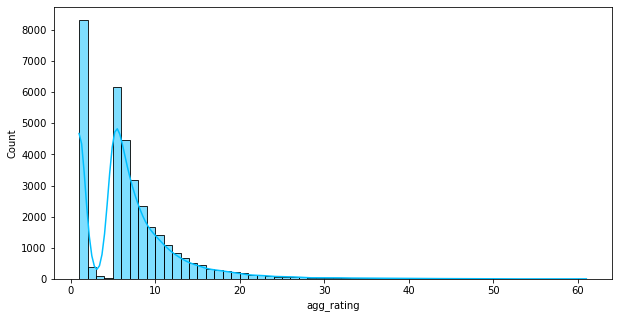

In [27]:
# WRITE YOUR CODE HERE
plt.figure(figsize=(10,5))
sns.histplot(data=user_df, 
             x='agg_rating', 
             kde=True,  
             color='deepskyblue', 
             bins=60)
;

Your user enrollment histogram may look like the following:


### Task: Find the Top-20 Most Popular Courses


Now we know how many items each user rated. Let's see the most popular 20 courses, i.e., items with the most rating counts.


*TODO: Use Pandas groupby() and size() methods on the item column to aggregate the rating count for each item, then use the sort_values() method to sort the course enrollment count, and use the slice method to get the top 20 courses. You may also implement this task with different solutions*


In [28]:
# WRITE YOUR CODE HERE
item_df=ratings_df.groupby(['item'],as_index=False)['rating'].size()
item_df.rename(columns={'size':'Enrolls', 'item':'COURSE_ID'}, inplace=True)
item_df=item_df.sort_values(by='Enrolls', ascending=False)
item_df

,COURSE_ID,Enrolls
101,PY0101EN,14936
54,DS0101EN,14477
4,BD0101EN,13291
5,BD0111EN,10599
42,DA0101EN,8303
...,...,...
113,ST0201EN,1
114,ST0301EN,1
66,DX0106EN,1
68,DX0108EN,1


In [29]:
top = slice(0,20)
top_20=item_df[top]
top_20

,COURSE_ID,Enrolls
101,PY0101EN,14936
54,DS0101EN,14477
4,BD0101EN,13291
5,BD0111EN,10599
42,DA0101EN,8303
55,DS0103EN,7719
82,ML0101ENv3,7644
18,BD0211EN,7551
56,DS0105EN,7199
1,BC0101EN,6719


Now you may only see the item IDs which do not indicate what kind of courses they are. To make it more clear, we need to join the course titles in the course metadata dataset (`course_df`) so that we can identify what the most popular courses are immediately:

*TODO: Use Pandas merge() method to join the course_df (contains the course title column).*


In [30]:
# WRITE YOUR CODE HERE
top_20_complete=course_df.merge(top_20, on='COURSE_ID')
top_20_complete = top_20_complete[['TITLE','Enrolls']]
top_20_complete.sort_values(by='Enrolls', ascending=False)

,TITLE,Enrolls
16,python for data science,14936
12,introduction to data science,14477
7,big data 101,13291
14,hadoop 101,10599
11,data analysis with python,8303
5,data science methodology,7719
10,machine learning with python,7644
2,spark fundamentals i,7551
4,data science hands on with open source tools,7199
0,blockchain essentials,6719


It seems that those popular courses take a huge amount of total ratings. Let's find the exact percentage.


In [31]:
# Get the total course enrollments again
total = ratings_df.shape[0]
total

233306

In [32]:
top = 0

*TODO: Get the percentage of the top-20 course enrollments.*


In [33]:
# WRITE YOUR CODE HERE
top=top_20_complete['Enrolls'].sum()

In [34]:
print(f"Percentage of the top course enrollments {round((top * 100)/total, 2)}%")

Percentage of the top course enrollments 63.3%


### Summary


Congratulations, you have completed the EDA lab! In this lab, you performed exploratory data analysis on the course metadata and course enrollments datasets and obtained some preliminary understanding.

As you know, these raw datasets can not be used to build recommender systems directly. Later, you will learn and practice how to process them and extract features for machine learning tasks.


## Authors


[Yan Luo](https://www.linkedin.com/in/yan-luo-96288783/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML321ENSkillsNetwork32585014-2022-01-01)


### Other Contributors


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description          |
| ----------------- | ------- | ---------- | --------------------------- |
| 2021-10-25        | 1.0     | Yan        | Created the initial version |


Copyright © 2021 IBM Corporation. All rights reserved.
